# Import

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from indicator import *

In [2]:
def import_package(depth: int, is_jupyter: bool):
    if is_jupyter is False:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    else:
        current_dir = os.getcwd()

    parent_dir = current_dir
    while depth > 0:
        depth -= 1
        parent_dir = os.path.dirname(parent_dir)
    print(current_dir)
    print(parent_dir)
    sys.path.insert(0, parent_dir)

import_package(1, True)


D:\Savage\bkc\Indicator\notebooks
D:\Savage\bkc\Indicator


# Configuration

In [3]:
path_raw = "D:/Savage/bkc/Indicator/data/new_data/BTCUSDT_5m_2022-01-01_2022-06-01.csv"
fetureList = ["close", "SMA 7",	"SMA 25", "SMA 99",	"EMA 7", "EMA 25", "EMA 99", "bband upper", "bband middle",	"bband lower", "ADX 14", "K", "D", "J"]
path_export_data = 'D:/Savage/BKC/Indicator/notebooks/export_data/discrete_data'
bins_number = [10, 20, 50, 99, 999]
decimal_round = 3

In [4]:
df = pd.read_csv(path_raw)

# Calculate indicators

In [5]:
def cal_indicator(df, is_sma: bool, is_ema: bool, is_bband: bool, is_adx: bool, is_kdj: bool, is_mom: bool, is_rsi: bool, is_wma: bool, is_stck: bool, is_stcd: bool, begin: int, end: int, filename: str) -> indicator_set.IndicatorSet:
    # set up
    ins_set = IndicatorSet()
    ins_set.insert_data_frame(df[begin:end], [["high"],["low"],["close"]], timestamp_column="open time", timestamp_unit='ms')
    # ins_set.generate_ohlc("close", "15T")

    # calculate indicator
    if is_sma:
        ins_set.insert_indicator(SMAIndicator(7), "sma7", ["close"], ["SMA 7"])
        ins_set.insert_indicator(SMAIndicator(25), "sma25", ["close"], ["SMA 25"])
        ins_set.insert_indicator(SMAIndicator(99), "sma99", ["close"], ["SMA 99"])

    if is_ema:
        ins_set.insert_indicator(EMAIndicator(7), "ema7", ["close"], ["EMA 7"])
        ins_set.insert_indicator(EMAIndicator(25), "ema25", ["close"], ["EMA 25"])
        ins_set.insert_indicator(EMAIndicator(99), "ema99", ["close"], ["EMA 99"])

    if is_bband:
        ins_set.insert_indicator(BBANDSIndicator(10), "bollingers", ["close"], ["bband upper", "bband middle", "bband lower"])

    if is_adx:
        ins_set.insert_indicator(ADXIndicator(14), "adx14", ["high", "low", "close"], ["ADX 14"])

    if is_kdj:
        ins_set.insert_indicator(KDJIndicator(), "kdj", ["high", "low", "close"], ["K", "D", "J"])

    if is_mom:
        ins_set.insert_indicator(MOMIndicator(7), "mom7", ["close"], ["MOM 7"])
        ins_set.insert_indicator(MOMIndicator(25), "mom25", ["close"], ["MOM 25"])
        ins_set.insert_indicator(MOMIndicator(99), "mom99", ["close"], ["MOM 99"])

    if is_wma:
        ins_set.insert_indicator(WMAIndicator(7), "wma7", ["close"], ["WMA 7"])
        ins_set.insert_indicator(WMAIndicator(25), "wma25", ["close"], ["WMA 25"])
        ins_set.insert_indicator(WMAIndicator(99), "wma99", ["close"], ["WMA 99"])

    if is_rsi:
        ins_set.insert_indicator(RSIIndicator(6), "rsi6", ["close"], ["RSI 6"])
        ins_set.insert_indicator(RSIIndicator(12), "rsi12", ["close"], ["RSI 12"])
        ins_set.insert_indicator(RSIIndicator(24), "rsi24", ["close"], ["RSI 24"])

    if is_stck:
        ins_set.insert_indicator(STCKIndicator(10), "stck10", ["high", "low", "close"], ["STCK 10"])

    if is_stcd:
        ins_set.insert_indicator(STCDIndicator(7), "stcd7", ["STCK 10"], ["STCD 7"]) # Đang còn nhập nhằng về timeperiod vì phụ thuộc timeperiod của stck

    ins_set.calculate()

    return ins_set

# Plot heat
map correlation

In [6]:
def plot_heat(df, title):

    cor = df.corr(method='pearson')
    f, ax = plt.subplots(figsize=(12, 10))
    # Generate a mask for upper traingle
    mask = np.triu(np.ones_like(cor, dtype=bool))
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap
    sns.heatmap(cor, annot=True, mask = mask, cmap=cmap)
    ax.set_title(title)


# Main


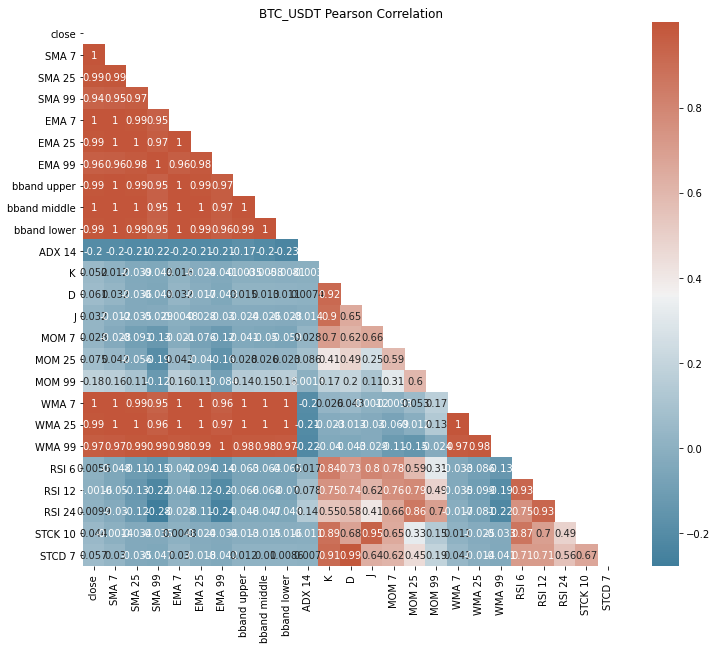

In [7]:
ins = cal_indicator(df, True, True, True, True, True, True, True, True, True, True, len(df) - 1500, len(df), df)

# store original data
ins.to_csv("export_data/base/base.csv")

# make new data
df_new = pd.read_csv("export_data/base/base.csv")[300:] # skip first 300 rows
df_new.drop('high', axis =1 , inplace= True)
df_new.drop('low', axis =1 , inplace= True)

# store new data
df_new.to_csv("export_data/clean_data/clean_data.csv")

# plot heat map
plot_heat(df_new, 'BTC_USDT Pearson Correlation')

# Continuous -> discrete data
Ex:

Set A = (0, 95) -> Set A = [(0,10], (10,20], (20,30], (30,40], (40,50], (50,60], (60,70], (70,80], (80, 90], (90,100]]

In [8]:
df_new

,open time,close,SMA 7,SMA 25,SMA 99,EMA 7,EMA 25,EMA 99,bband upper,bband middle,...,MOM 25,MOM 99,WMA 7,WMA 25,WMA 99,RSI 6,RSI 12,RSI 24,STCK 10,STCD 7
300,2022-05-28 20:00:00,29007.09,29000.864286,28969.1312,28967.661919,29005.477247,28975.526069,28947.050783,29056.130354,28988.375,...,120.48,154.82,29013.241429,28984.368892,28966.714283,55.687999,57.502675,54.812827,51.669624,56.685019
301,2022-05-28 20:05:00,29018.70,29011.672857,28973.8020,28969.407980,29008.782936,28978.847140,28948.483767,29061.721440,28993.786,...,116.77,172.86,29017.700357,28988.181877,28967.735044,60.449881,59.862324,55.977505,61.034038,65.404167
302,2022-05-28 20:10:00,29002.58,29015.745714,28977.4680,28971.171212,29007.232202,28980.672745,28949.565692,29062.757583,28997.585,...,91.65,174.56,29015.427143,28990.395569,28968.398485,51.270043,55.218341,53.962398,48.031941,66.451941
303,2022-05-28 20:15:00,29034.81,29022.667143,28982.1136,28973.038081,29014.126651,28984.837149,28951.270578,29065.719946,29006.214,...,116.14,184.82,29020.193214,28994.806492,28969.671261,64.283331,61.699151,57.178468,74.028069,68.911475
304,2022-05-28 20:20:00,29003.77,29019.434286,28984.8860,28974.490202,29011.537488,28986.293522,28952.320566,29054.706805,29012.287,...,69.31,143.76,29015.468929,28996.472369,28970.285899,49.122737,53.556086,53.427669,48.991773,61.626299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2022-06-01 23:35:00,29868.04,29907.702857,29739.8556,30082.293434,29870.712650,29801.756408,30145.403098,30043.135105,29863.389,...,184.24,-1106.64,29889.188929,29794.544985,29904.415125,53.821103,55.440125,50.453657,42.192607,57.855655
1496,2022-06-01 23:40:00,29826.78,29874.795714,29745.9576,30071.265859,29859.729488,29803.681300,30139.030636,30035.103035,29871.891,...,152.55,-1091.73,29868.958214,29801.231477,29899.304857,47.027579,51.862952,48.810224,29.197455,48.296535
1497,2022-06-01 23:45:00,29843.52,29864.532857,29750.7520,30061.135051,29855.677116,29806.745815,30133.120423,30024.235076,29881.527,...,119.86,-1002.95,29861.139286,29808.736277,29894.749939,50.094472,53.199490,49.506536,33.141702,43.962295
1498,2022-06-01 23:50:00,29796.83,29862.160000,29755.9388,30050.598788,29840.965337,29805.983060,30126.394615,30023.382232,29882.105,...,129.67,-1043.09,29844.213571,29812.280738,29889.463838,41.963065,49.055257,47.621265,6.460835,39.487683


In [9]:
# convert a list continuous data to discrete data
def toDiscreteColumn(minVal, maxVal, nums):
    period = (maxVal - minVal)/nums
    range_list = list(minVal + i*period for i in range(nums + 1))
    range_list = [round(elem, decimal_round) for elem in range_list]
    return range_list

# JUST EXAMPLE TO SEE HOW FUNCTION WORKS
print("Show example of discrete data [Close]:")
toDiscreteColumn(df_new.close.min(), df_new.close.max(), 10)
    

Show example of discrete data [Close]:


[28858.03,
 29202.323,
 29546.616,
 29890.909,
 30235.202,
 30579.495,
 30923.788,
 31268.081,
 31612.374,
 31956.667,
 32300.96]

In [10]:
df_new.drop('open time', axis =1 , inplace= True)
def toDiscrete(df_new, featureList, nums):
    df = df_new.copy()
    for item in featureList:
        column = df[item]
        bins = toDiscreteColumn(column.min(), column.max(), nums)
        column = pd.cut(column, bins = bins, labels=[f'[{bins[i]},{bins[i+1]}]' for i in range(len(bins)-1)])
        df[item] = column
    df.to_csv(f"export_data/discrete_data/new_discrete{nums}.csv")
    return df

# YOU CAN MODIFY THE FEATURE LIST TO YOUR NEEDS (IN THE CONFIGURATIONS SECTION)
for i in bins_number:
    toDiscrete(df_new, fetureList, i)

# Symmetric Uncertainty Correlation

In [11]:
import skfeature.utility.entropy_estimators as ee


def information_gain(data1, data2):
    """
    Function calculates the information gain, where IG(data1,data2) = H(data1) - H(data1|data2)
    Input
    -----
    data1: {numpy array}, shape (n_samples,)
    data2: {numpy array}, shape (n_samples,)
    Output
    ------
    IG: {float}
        IG: information gain of data1, data2
    """

    ig = ee.entropyd(data1) - conditional_entropy(data1, data2)
    return ig


def conditional_entropy(data1, data2):
    """
    Function calculates the conditional entropy, where ce = H(data1) - I(data1;data2)
    Input:
    -------------------------------------
    data1: {numpy array}, shape (n_samples,)
    data2: {numpy array}, shape (n_samples,)
    Output
    -------------------------------------
    ce: {float}
        ce: Conditional entropy of data1 and data2
    """

    ce = ee.entropyd(data1) - ee.midd(data1, data2)
    return ce


def su_calculation(data1, data2):
    """
    Function calculates the symmetrical uncertainty, where su(data1,data2) = 2*IG(data1,data2)/(H(data1)+H(data2))
    Input
    -------------------------------------
    data1: {numpy array}, shape (n_samples,)
    data2: {numpy array}, shape (n_samples,)
    Output
    -------------------------------------
    su: {float}
        su: Symmetrical uncertainty of data1 and data2
    """

    # calculate information gain of data1 and data2, t1 = ig(data1,data2)
    t1 = information_gain(data1, data2)
    # calculate entropy of data1, t2 = H(data1)
    t2 = ee.entropyd(data1)
    # calculate entropy of data2, t3 = H(data2)
    t3 = ee.entropyd(data2)
    # su(data1,data2) = 2*t1/(t2+t3)
    su = 2.0*t1/(t2+t3)

    return su

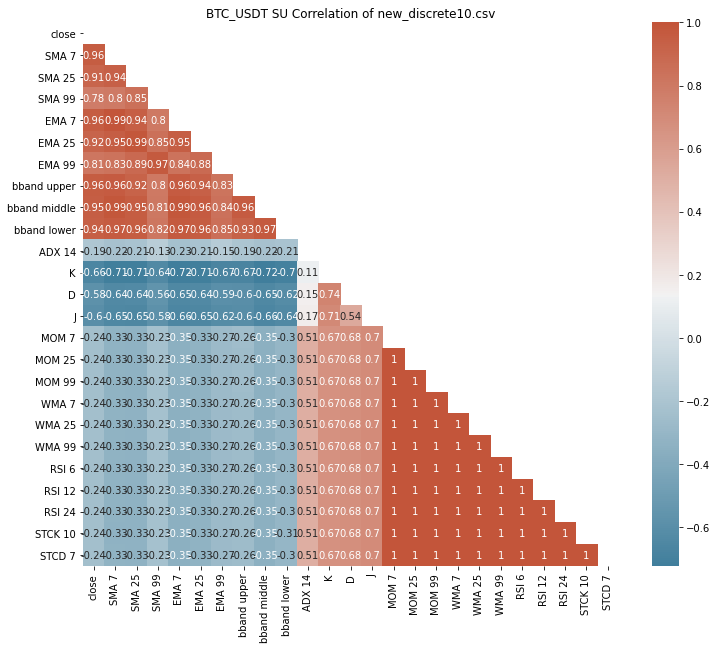

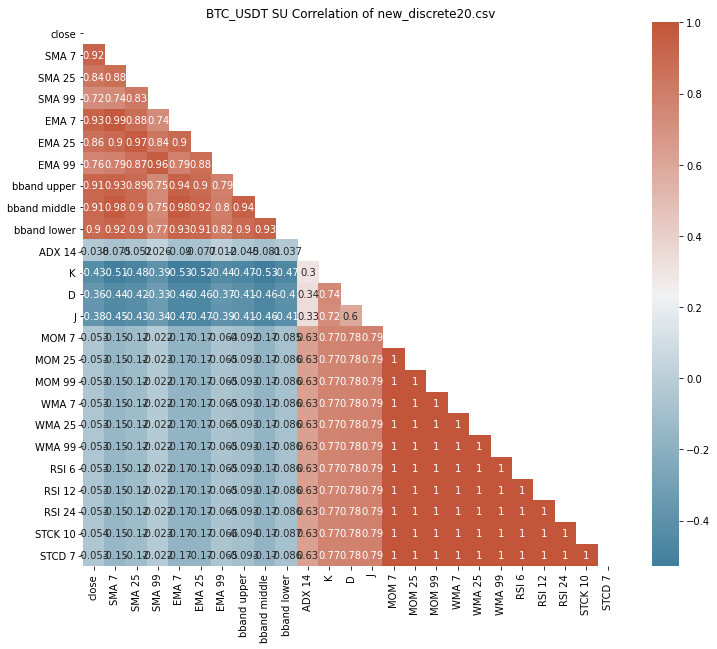

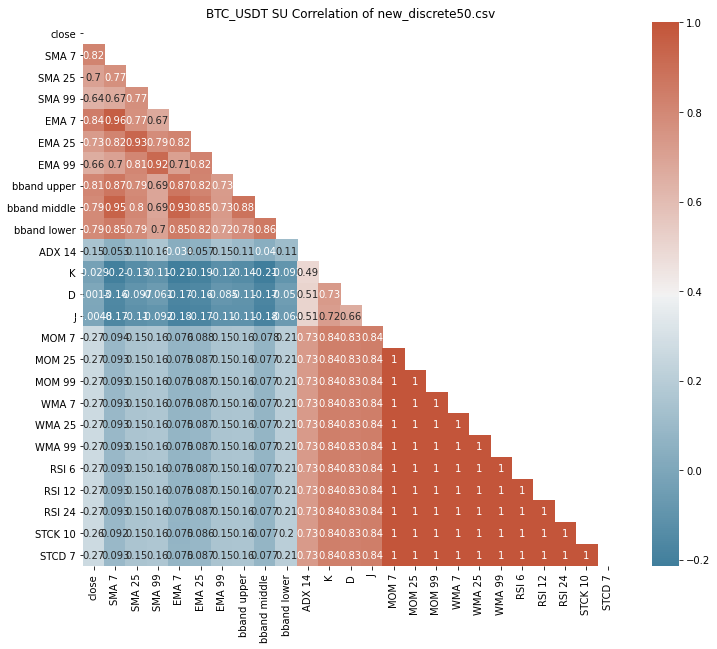

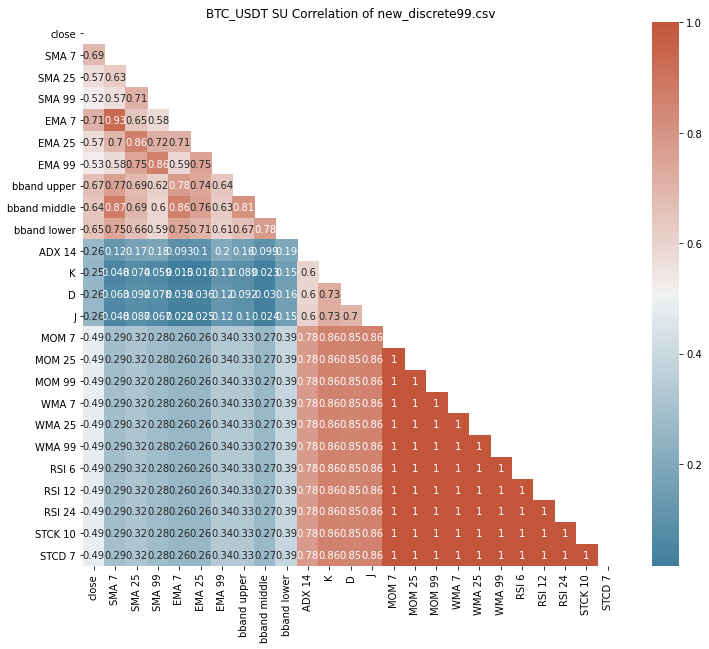

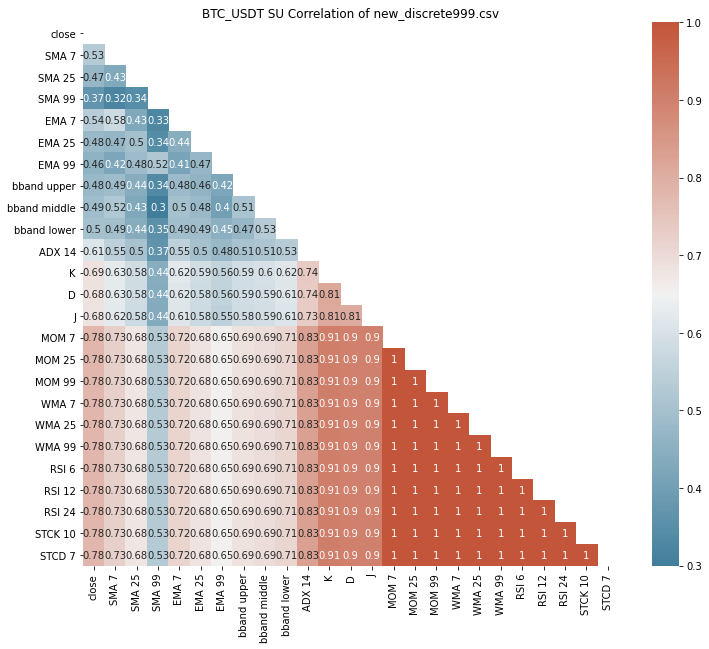

In [12]:
dir_list = os.listdir(path_export_data)
l = []
for item in os.listdir(path_export_data):
    df = pd.read_csv(f'{path_export_data}/{item}', index_col=[0])
    columns = df.columns
    matrix=[] #define empty matrix
    for i in columns: 
        row=[] 
        for j in columns: 
            a = su_calculation(df[i], df[j])
            row.append(a) # adding a value for each column for this row
        matrix.append(row) # add fully defined column into the row
    df_final = pd.DataFrame(matrix, columns =df.columns, index= df.columns)
    plot_heat(df_final, f'BTC_USDT SU Correlation of {item}')